# TP3 et TP4 de PRST

Ce TP est à faire sur deux séances.

## Test du Khi-deux (45 minutes maximum)

Lorsqu'on collecte des données (relevés statistiques divers, générateur de nombres pseudo-aléatoires...), il peut être utile de connaître un modèle probabiliste de ces données. Ainsi on pourra ensuite prédire certaines valeurs, calculer des probabilités qu'une mesure dépasse une valeur donnée, etc...

On peut par exemple supposer que les données mesurées suivent une loi normale, uniforme, etc.. Comment "tester" si cette hypothèse est correcte ou non ?

C'est le problème de comparaison d'une distribution statistique observée à une distribution de probabilité théorique supposée.

Pour cela, on peut réaliser un test du khi-deux.

Il consiste en calculer la grandeur : $S=\sum_{k=1}^n\frac{(O_k-E_k)^2}{E_k}$

Où :
* $O_k$ les **effectifs** observés
* $E_k$ les **effectifs** théoriques attendus (*expected* en anglais, d'où la lettre $E$...)

On voit bien que si $S=0$, alors le modèle colle parfaitement à la réalité. Au plus $S$ va être grand, au plus on va s'éloigner du modèle... Mais quel va être le **seuil** à partir duquel on dira "on rejette l'hypothèse de confimité entre notre modèle et la réalité" ?

Prenons l'exemple suivant : 





On admet que $S$ est une variable aléatoire qui suit la loi dite du $\chi^2$ (khi-deux). Voir votre cours de PRST pour plus de détails.

### Exercice de découverte

On lance 60 fois un dé. On obtient les résultats suivants :

| Numéro de la face | 1 | 2 | 3 | 4 | 5 | 6 |
| --- | --- | --- | --- | --- | --- |--- |
| Effectifs | 15 | 7 | 4 | 11 | 6 | 17 |

Peut-on supposer que le dé est truqué avec un risque de 5% de se tromper ? Nous allons répondre à cette question ci-dessous.

1. Calculer $S$. On utilisera plutôt des listes pour stocker les données.

In [9]:
Ok = [15, 7, 4, 11, 6, 17]
S = 0.0

for elm in Ok:
    S += (elm-(60/6))**2/(60/6)

print(S)

13.6


2. Comme dit $S$ est une variable aléatoire qui suit la loi dite du $\chi^2$. Combien y-a-il de **degrés de liberté** ? Quelle valeur du khi-deux théorique lisez-vous sur la table au seuil de 5%

degreLiberte = nbClasses - nbContraintes

nbClasses = 6 (6 faces)
nbContraintes = 1 (Loi Uniforme)

degreLiberte = 6 - 1
degreLiberte = 5

Khi-deux = 11.070

3. Conclure : rejette-on l'hypothèse que le dé est non pipé au seuil de 5% ? Pourquoi ?

13.6 > 11.070 Donc on rejete l'hypothèse.

4. Retrouvez la valeur ci-dessus en utilisant la fonction `chisquare` du module `scipy.stats`

In [11]:
import scipy.stats as sc

Ok = [15, 7, 4, 11, 6, 17]

print(sc.chisquare(Ok))

Power_divergenceResult(statistic=13.6, pvalue=0.01836019640951945)


5. Que représente la `pvalue`? Expliquez.

La pvalue est la probabilité d'obtenir la même valeur du test si l'hypothèse null est vraie

### Exercice d'application : "birthday spacings"

On considère un générateur de nombres pseudos-aléatoires produisant $m$ entiers $I_1, I_2,...,I_m$ compris entre 1 et $n$.

On peut voir ça comme $m$ anniversaires dans une année de $n$ jours d'où le nom du test !

On les classe par ordre croissant :

$I_{(1)}, I_{(2)},...,I_{(m)}$ (les parenthèses en indices signifient simplement qu'ils ont été renumérotés. En effet $I_1$ n'est pas nécessairement égale à $I_{(1)}$

On liste ensuite les écarts entre ces $m$ "anniversaires" :

$I_{(1)}, I_{(2)}-I_{(1)}, ..., I_{(m)}-I_{(m-1)}$

On note $Y$ le nombre d'écarts qui apparaissent plus d'une fois dans cette liste. $Y$ vaut alors $m$ moins le nombre d'écarts distincts.

On admet que, si le générateur est bon, $Y$ **doit** être distribué selon une loi de Poisson d'espérance $\frac{m^{3}}{4n}$.

D'après l'expérience, on a $n=2^{24}$ et $m=2^{10}$.

Dans cet exercice, nous allons tester si le générateur du module `random` passe ce test !

1. Générer m valeurs comprises entre 0 et n et les classer dans l'ordre croissant.

In [4]:
from random import randint
listM = []

for i in range(pow(2, 10)):
    listM.append(randint(0, pow(2, 24)))

listM.sort()

2. Lister les écarts et dénombrer le nombre de valeurs qui appaaissent plus d'une fois dans la liste. (2 lignes en python avec la structure `set`). On trouve ainsi 1 valeur de $Y$

In [5]:
liEcarts = []

for i in range(len(listM)-1):
    liEcarts.append(listM[i+1] - listM[i])

ensembleEcarts = set(liEcarts)
print(len(liEcarts) - len(ensembleEcarts))

17


3. Écrire une fonction qui va nous générer 500 valeurs de $Y$.

In [6]:
def trouverY():
    listM = []

    for i in range(pow(2, 10)):
        listM.append(randint(0, pow(2, 24)))

    listM.sort()
    liEcarts = []

    for i in range(len(listM)-1):
        liEcarts.append(listM[i+1] - listM[i])

    ensembleEcarts = set(liEcarts)
    return(len(liEcarts) - len(ensembleEcarts))

liY = []
for i in range(500):
    liY.append(trouverY())
liY.sort()
print(liY)

[5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 1

  
4. Représenter sous forme d'histogramme les données précédentes. Vérifier visuellement que cela semble correspondre à la loi de Poisson cherchée...  

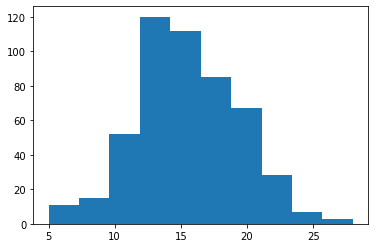

In [7]:
from matplotlib import pyplot as plt

counts, bin, bar = plt.hist(liY)

plt.show()


5. Nous allons faire un test du khi-deux. À partir de l'objet précédent (`plt.hist`, lire la doc), afficher la liste des effectifs observés.

In [8]:
print(counts)

[ 11.  15.  52. 120. 112.  85.  67.  28.   7.   3.]


6. Calculer les effectifs théoriques selon la loi de Poisson visée.

217.07812411598567
[0.4916736806934244, 3.738703522519174, 14.296812046361373, 32.24613020383997, 47.36601391238934, 48.482704176865646, 36.32360295397276, 20.677471587349277, 9.210035403224447, 3.286730693010349, 0.9582459357598999]


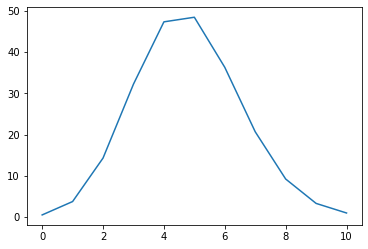

In [9]:
import math
from scipy.special import factorial

lambd = 2**30 / (4 * 2**24)


effTot = 0
for elm in counts:
    effTot += elm

liEffTheo = []
for elm in bin:
    liEffTheo.append(math.exp(-lambd) * (lambd**elm/factorial(elm)) * effTot)

somme = 0
for elm in liEffTheo:
    somme += elm
print(somme)
print(liEffTheo)

plt.plot(liEffTheo)
plt.show()


7. Représenter sur un même graphique les effectifs théoriques et les observés.

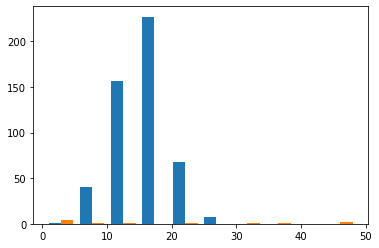

In [11]:
plt.hist([liY,liEffTheo])
plt.show()

8. Faites un test du khi-deux et conclure !

In [12]:
#Les données précédentes sont fausses

### Pour le plaisir

Reprendre la même étude (vous êtes libre de sauter certaines étapes) avec le GCL de votre choix !